In [1]:
import requests
res = requests.get('https://my83.com.tw/question')

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [53]:
question_list = []
domain = 'https://my83.com.tw'
for section in soup.select('#questionList section'):
    #print(section)
    link = domain + section.select('a')[0]['href']
    question_label, question = section.select('h3')[0].contents
    tags = ','.join([tag.text for tag in section.select('.tag')])
    dt, replies = section.select('.text-right .list-group-item-text')
    userinfo    = section.select('.userInfo')[0].text.strip()
    content     = section.select('.content')[0].text.strip()
    question_list.append({'question_label':question_label.text, \
                          'question'      :question, \
                          'content'       :content, \
                          'dt'            :dt.text, \
                          'replies'       :replies.text, \
                          'tags'          :tags, \
                          'userinfo'      :userinfo,\
                          'link'          :link})


In [54]:
import pandas
questiondf = pandas.DataFrame(question_list)

In [56]:
questiondf.head()

,content,dt,link,question,question_label,replies,tags,userinfo
0,諜對蝶【LINE】：spyvsfly\r\n 看的到素質.教育服務態度【以客為尊】\r\n ...,2017-11-30 04:21:55,https://my83.com.tw/question/12153,台南外約♥諜對蝶LINE：spyvsfly 台南叫小姐,投保問題,0,"其他,保險觀念",201545562
1,諜對蝶【LINE】：spyvsfly\r\n 看的到素質.教育服務態度【以客為尊】\r\n ...,2017-11-30 03:16:49,https://my83.com.tw/question/12152,宜蘭魚訊♥諜對蝶LINE：spyvsfly宜蘭正妹,投保問題,0,"其他,理賠",201545562
2,諜對蝶【LINE】：spyvsfly\r\n 看的到素質.教育服務態度【以客為尊】\r\n ...,2017-11-30 02:56:21,https://my83.com.tw/question/12151,彰化外送茶♥諜對蝶LINE：spyvsfly彰化外約,閒聊,0,"其他,理賠",201545562
3,個人資訊：\r\n年齡 27 / 女性 / 單身\r\n台北市外商文書工作 / 通勤以捷運為...,2017-11-29 21:46:05,https://my83.com.tw/question/12149,27 歲女第一張保單醫療險請益,保單好不好,5,"小資族,實支實付醫療,醫療險,癌症險,重大疾病險",Birdy
4,這些是以前當學生時買的保單(新光人壽)請問可以幫我檢查一下我還需加點甚麼嗎?\r\n目前本人...,2017-11-29 21:42:16,https://my83.com.tw/question/12148,保單健檢,保單好不好,7,小資族,momo77


## 抓取內容

In [57]:
import requests
res = requests.get('https://my83.com.tw/question/12013')

In [59]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [64]:
question_content = soup.select('.question-content')[0].text
question_content

'33歲 男性 有1子女 請問現有保單有需要增加或減少的地方嗎?\n\r\n富邦人壽真心關懷重大疾病暨特定傷病終身健康保險主約  30萬\r\n富邦人壽防癌終身健康保險附約(PCC1) 3單位\r\n富邦人壽享安心住院醫療定額健康保險附約 1000元\r\n富邦人壽長青健康保險附約(計畫c) 1單位\r\n富邦人壽新住院醫療定期健康保險附約(HSC5) 1單位\r\n富邦人壽安心寶意外傷害保險附約 100萬 \r\n安心寶意外傷害保險附約意外傷害醫療保險金一般型 5萬 \r\n富邦人壽日額型意外傷害住院醫療保險附約 20單位 \r\n富邦人壽保險費豁免附約條款 '

In [81]:
import pandas
answer_ary = []
for answer in soup.select('#answerList .item'):
    author   = answer.select('.consultation')[0].text
    content  = answer.select('.answer-content')[0].text
    identity = answer.select('.col-sm-8 .list-group-item-text')[1].text
    date     = answer.select('.date')[0].text
    answer_ary.append({'author' : author,\
                      'content' : content,\
                      'identity': identity,\
                      'date'    : date})
    #print('============================================')

In [83]:
answerdf = pandas.DataFrame(answer_ary)
answerdf

,author,content,date,identity
0,保險經紀人Roger,富邦人壽真心關懷重大疾病暨特定傷病終身健康保險主約 30萬\n理賠包含癌症在內多項特殊疾病\...,2017-11-22 01:41:09,保險業務員 @ 新北市
1,保險經紀人Ann,VC610您好\n富邦人壽真心關懷重大疾病暨特定傷病終身健康保險主約 30萬\n重大傷病的部...,2017-11-22 02:12:19,保險業務員 @ 高雄市
2,林珉毅,PCC1跟享安心住院可以有更好的選擇\n\n有任何問題或需要服務的地方歡迎來信!\n感謝您!,2017-11-29 20:57:46,保險業務員 @ 台中市 磐石保經


## 整理內容頁

In [84]:
link = 'https://my83.com.tw/question/12013'

In [129]:
import requests
import pandas
import re
import json
import pandas
from bs4 import BeautifulSoup

link = 'https://my83.com.tw/question/12013'
res = requests.get(link)
soup = BeautifulSoup(res.text, 'html.parser')

m = re.search('question: (.*)',res.text)

jd = json.loads(m.group(1).rstrip(','))

output = {}
output['content']      = jd['content']
output['careate_time'] = jd['created_time']
output['nickname']     = jd['nickname']
output['tag_name']     = ','.join([tag['tag_name'] for tag in jd['tag']])
output['title']        = jd['title']
output['category']     = jd['category']
output['link']         = link
output

{'careate_time': '2017-11-22 01:01:51',
 'category': 'policy',
 'content': '33歲 男性 有1子女 請問現有保單有需要增加或減少的地方嗎?<br />\r\n<br />\r\n富邦人壽真心關懷重大疾病暨特定傷病終身健康保險主約  30萬<br />\r\n富邦人壽防癌終身健康保險附約(PCC1) 3單位<br />\r\n富邦人壽享安心住院醫療定額健康保險附約 1000元<br />\r\n富邦人壽長青健康保險附約(計畫c) 1單位<br />\r\n富邦人壽新住院醫療定期健康保險附約(HSC5) 1單位<br />\r\n富邦人壽安心寶意外傷害保險附約 100萬 <br />\r\n安心寶意外傷害保險附約意外傷害醫療保險金一般型 5萬 <br />\r\n富邦人壽日額型意外傷害住院醫療保險附約 20單位 <br />\r\n富邦人壽保險費豁免附約條款 ',
 'link': 'https://my83.com.tw/question/12013',
 'nickname': 'VC610',
 'tag_name': '小家庭,實支實付醫療,住院日額型醫療,意外險,癌症險',
 'title': '33歲 男性 有1子女 請問富邦人壽保單有需要增加或減少的地方嗎?'}

In [130]:
import pandas, sqlite3
df = pandas.DataFrame([output])
#df

with sqlite3.connect('my83.sqlite') as db:
    df.to_sql('question', con = db, if_exists='replace')

In [131]:
with sqlite3.connect('my83.sqlite') as db:
    df2 = pandas.read_sql_query('select * from question', con = db)
df2

,index,careate_time,category,content,link,nickname,tag_name,title
0,0,2017-11-22 01:01:51,policy,33歲 男性 有1子女 請問現有保單有需要增加或減少的地方嗎?<br />\r\n<br /...,https://my83.com.tw/question/12013,VC610,"小家庭,實支實付醫療,住院日額型醫療,意外險,癌症險",33歲 男性 有1子女 請問富邦人壽保單有需要增加或減少的地方嗎?


## 抓取清單頁，將問題存進資料庫中

In [133]:
import requests
import pandas
import re
import json
import pandas
from bs4 import BeautifulSoup

def getQuestions(link):
    res = requests.get(link)
    soup = BeautifulSoup(res.text, 'html.parser')

    m = re.search('question: (.*)',res.text)

    jd = json.loads(m.group(1).rstrip(','))

    output = {}
    output['content']      = jd['content']
    output['careate_time'] = jd['created_time']
    output['nickname']     = jd['nickname']
    output['tag_name']     = ','.join([tag['tag_name'] for tag in jd['tag']])
    output['title']        = jd['title']
    output['category']     = jd['category']
    output['link']         = link
    return output

In [137]:
import requests
from bs4 import BeautifulSoup
question_url = 'https://my83.com.tw/question/index?page={}'
domain = 'https://my83.com.tw'

question_list = []
for page in range(1,4):
    print(page)
    res = requests.get(question_url.format(page))
    soup = BeautifulSoup(res.text, 'lxml')

    for section in soup.select('#questionList section'):
        link = domain + section.select('a')[0]['href']
        question_list.append(getQuestions(link))


1
2
3


In [138]:
import pandas, sqlite3
df = pandas.DataFrame(question_list)
with sqlite3.connect('my83.sqlite') as db:
    df.to_sql('questions', con = db, if_exists='replace') # replace, append

In [140]:
with sqlite3.connect('my83.sqlite') as db:
    df2 = pandas.read_sql_query('select * from questions where content like "%富邦%" ', con = db)
df2

,index,careate_time,category,content,link,nickname,tag_name,title
0,8,2017-11-29 14:18:43,question,富邦nhr1有包含住院前後門診費用嗎 謝謝,https://my83.com.tw/question/12138,,"小家庭,其他,實支實付醫療,理賠",富邦nhr1有包含住院前後門診費用嗎 謝謝
1,23,2017-11-28 11:23:46,question,目前規劃雙實支-其中一家是用全球<br />\r\n全球：LDC(C型) -20年/1萬+X...,https://my83.com.tw/question/12108,fy,"小資族,保險類型,實支實付醫療,醫療險,意外險,癌症險,重大疾病險,定期",MY83精選搭配-富邦.國泰.南山


## 整理回答

In [158]:
import requests
import pandas
import re
import json
import pandas
from bs4 import BeautifulSoup

def parseQuestion(res):
    m = re.search('question: (.*)',res.text)

    jd = json.loads(m.group(1).rstrip(','))

    #questions
    questions = {}
    questions['content']      = jd['content']
    questions['careate_time'] = jd['created_time']
    questions['nickname']     = jd['nickname']
    questions['tag_name']     = ','.join([tag['tag_name'] for tag in jd['tag']])
    questions['title']        = jd['title']
    questions['category']     = jd['category']
    questions['link']         = link
    return questions
    

def parseAnswer(res):
    #answers
    soup = BeautifulSoup(res.text, 'lxml')
    answer_ary = []
    for answer in soup.select('#answerList .item'):
        if answer.select_one('.consultation'):
            author   = answer.select('.consultation')[0].text
            content  = answer.select('.answer-content')[0].text
            identity = answer.select('.col-sm-8 .list-group-item-text')[1].text
            date     = answer.select('.date')[0].text
            answer_ary.append({'author' : author,\
                              'content' : content,\
                              'identity': identity,\
                              'link'    : res.url,
                              'date'    : date})
    return answer_ary
    
def getQuestionsAndAnswers(link):
    res      = requests.get(link)
    question = parseQuestion(res)
    answer   = parseAnswer(res)
    return {'question':question, 'answer':answer}

In [159]:
#getQuestionsAndAnswers('https://my83.com.tw/question/12013')

In [160]:
import requests
from bs4 import BeautifulSoup
question_url = 'https://my83.com.tw/question/index?page={}'
domain = 'https://my83.com.tw'

question_list = []
answer_list   = []
for page in range(1,2):
    print(page)
    res = requests.get(question_url.format(page))
    soup = BeautifulSoup(res.text, 'lxml')

    for section in soup.select('#questionList section'):
        link = domain + section.select('a')[0]['href']
        qa   = getQuestionsAndAnswers(link)
        question_list.append(qa['question'])
        answer_list.extend(qa['answer'])

1


In [161]:
question_df = pandas.DataFrame(question_list)

with sqlite3.connect('my83.sqlite') as db:
    question_df.to_sql('questions', con = db, if_exists='replace' )

In [162]:
answer_df = pandas.DataFrame(answer_list)

with sqlite3.connect('my83.sqlite') as db:
    answer_df.to_sql('answers', con = db, if_exists='replace' )

In [164]:
with sqlite3.connect('my83.sqlite') as db:
    df2 = pandas.read_sql_query('select * from answers, questions where answers.link = questions.link', con = db)
df2.head()

,index,author,content,date,identity,link,index,careate_time,category,content,link,nickname,tag_name,title
0,0,阿佑,您好，依您的需求，業務員這樣設計保單是很常見的。\n因為投保內容多為終身險，因此，保費高出許...,2017-11-29 22:37:51,保險業務員 @ 高雄市,https://my83.com.tw/question/12149,0,2017-11-29 21:46:05,policy,"<div class=""image-grid""><a href=""/upload/quest...",https://my83.com.tw/question/12149,Birdy,"小資族,實支實付醫療,醫療險,癌症險,重大疾病險",27 歲女第一張保單醫療險請益
1,1,Korver,您好\n針對NDLR的部分，項目是有點少，建議都會選擇可以賠重大傷病的部分，像是遠雄、台灣、...,2017-11-29 21:57:32,保險業務員 @ 台北市,https://my83.com.tw/question/12149,0,2017-11-29 21:46:05,policy,"<div class=""image-grid""><a href=""/upload/quest...",https://my83.com.tw/question/12149,Birdy,"小資族,實支實付醫療,醫療險,癌症險,重大疾病險",27 歲女第一張保單醫療險請益
2,2,維尼,你好\n這保單的保費全規劃在最不重要的保障上\n光主約就佔了兩萬的保費預算\n全心守護只有住...,2017-11-29 22:44:40,保險業務員 @ 桃園市,https://my83.com.tw/question/12149,0,2017-11-29 21:46:05,policy,"<div class=""image-grid""><a href=""/upload/quest...",https://my83.com.tw/question/12149,Birdy,"小資族,實支實付醫療,醫療險,癌症險,重大疾病險",27 歲女第一張保單醫療險請益
3,3,Messi,20PCHI 全心守護醫療保險 20年期 1單位\n還本型，身故給付總繳保費，扣除已領取各項...,2017-11-30 00:33:07,保險業務員 @ 新竹市,https://my83.com.tw/question/12149,0,2017-11-29 21:46:05,policy,"<div class=""image-grid""><a href=""/upload/quest...",https://my83.com.tw/question/12149,Birdy,"小資族,實支實付醫療,醫療險,癌症險,重大疾病險",27 歲女第一張保單醫療險請益
4,4,保險經紀人Roger,主約終身醫療\n理賠日額跟手術定額\n在目前住院時間短高自費項目的趨勢下\n多數時候是拿自己...,2017-11-30 10:15:27,保險業務員 @ 新北市,https://my83.com.tw/question/12149,0,2017-11-29 21:46:05,policy,"<div class=""image-grid""><a href=""/upload/quest...",https://my83.com.tw/question/12149,Birdy,"小資族,實支實付醫療,醫療險,癌症險,重大疾病險",27 歲女第一張保單醫療險請益


## List Operation

In [144]:
a = []
a.append(1)
a.append(2)
a

[1, 2]

In [145]:
a.append([3,4])
a

[1, 2, [3, 4]]

In [146]:
a.extend([3,4])

In [147]:
a

[1, 2, [3, 4], 3, 4]

## 抓取PTT 的資料

In [166]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.ptt.cc/bbs/Insurance/index.html')
soup = BeautifulSoup(res.text, 'html.parser')

In [178]:
ptt_ary = []
for ent in soup.select('.r-ent'):
    ptt_dic = {}
    ptt_dic['title']  = ent.select('.title')[0].text.strip()
    ptt_dic['author'] = ent.select('.author')[0].text.strip()
    ptt_dic['date']   = ent.select('.date')[0].text.strip()
    ptt_dic['nrec']   = ent.select('.nrec')[0].text.strip()
    ptt_ary.append(ptt_dic)
    #print('==========================================')

In [180]:
import pandas
df = pandas.DataFrame(ptt_ary)
df

,author,date,nrec,title
0,bs422,11/29,2,新車車險比較
1,seasonyu,11/29,2,[討論] 電銷 康健人壽 新術術順心手術醫療險
2,hihappy,11/29,1,[其他] 南山美寶外幣終身分紅 受益人問題
3,you8888,11/29,2,[其他] 旅平險網路投保可用郵局金融visa卡付款?
4,b90402,11/29,,[險種] 29歲男 現有保單健檢
5,ipg4128,11/29,2,[核保] 兩年內復效，體檢問題
6,wing008021,11/29,1,[險種]0歲男寶保險規劃請益/中國
7,easy0807,11/29,1,[其他] 台灣人壽寶來美美元利率變動型增額
8,wwwweee,11/29,1,[險種] 55歲女 汽車保險檢視
9,hzrca,11/29,2,[討論] 0歲女保 雙實支規劃


In [183]:
import requests
from bs4 import BeautifulSoup
cookies = {
  'over18': '1'  
}
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies=cookies)
soup = BeautifulSoup(res.text, 'html.parser')

In [185]:
ptt_ary = []
for ent in soup.select('.r-ent'):
    ptt_dic = {}
    ptt_dic['title']  = ent.select('.title')[0].text.strip()
    ptt_dic['author'] = ent.select('.author')[0].text.strip()
    ptt_dic['date']   = ent.select('.date')[0].text.strip()
    ptt_dic['nrec']   = ent.select('.nrec')[0].text.strip()
    ptt_ary.append(ptt_dic)
    #print('==========================================')

In [186]:
import pandas
df = pandas.DataFrame(ptt_ary)
df

,author,date,nrec,title
0,coolcoolder,11/30,,Re: [問卦] 一例一休可能把資進黨拖垮，為何要硬幹？
1,ashia5287,11/30,,Re: [新聞] 全台空汙危機 教授po二張圖：典型的境內
2,rockon15,11/30,,Re: [新聞] 童過馬路遭輾！倒母懷中說「媽媽好痛」
3,bodhisattva,11/30,,[爆卦] 中研院研究：法院是有錢人開的!？
4,ffreakk,11/30,2,[新聞] 天天躺床上滑手機 壯男癱瘓大小便失禁
5,andy02,11/30,,Re: [新聞] 霸病床欠費破800萬！北榮逼出院無效…富
6,Kay731,11/11,,[公告] 八卦板板規(2017.11.11)
7,bzxbzxbzxbzx,11/10,74,[協尋] 11/8 高雄市苓雅區三多一路往鳳山前路口
8,yeongdah,11/21,38,[協尋] 11/18 台北市忠孝東路六段玉成街口車禍行車記錄器
9,EJwing,11/25,爆,[尋人] 朋友的鄰居的女兒


## 抓取卡提諾

In [194]:
import requests
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'
}
res = requests.get('https://ck101.com/', headers = headers)
#res.text

## 抓取永慶房屋

In [199]:
import requests
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'
}
res = requests.get('https://buy.yungching.com.tw/region', headers = headers)
#res.text

## 登入財報狗

In [213]:
from selenium import webdriver
driver = webdriver.Chrome()
driver.get('https://statementdog.com/users/sign_in')

In [214]:
driver.find_element_by_css_selector('#user_email').send_keys('kaikouu@gmx.com')
driver.find_element_by_css_selector('#user_password').send_keys('1qazXSW')


In [215]:
driver.find_element_by_css_selector('.submit-btn').click()

In [218]:
cookie = ';'.join(['{}={}'.format(cookie['name'], cookie['value']) for cookie in driver.get_cookies()])

In [223]:

import requests
headers = {
 'Cookie' : cookie      
}
res = requests.get('https://statementdog.com/api/v1/feeds', headers = headers)

import pandas
df = pandas.DataFrame(res.json()['items'])
df.head()

,collected,comments,comments_count,comments_pagination,content,created_at,created_or_replied_at,id,liked,likers_count,related_stocks,source_url,title,total_comments_count,type
0,False,[],0,"{'has_more_comments': False, 'next_url': None}",【時報記者沈培華台北報導】繼先前美系外資將台積電 (2330) 評等降至中立後，一家亞系外資...,2017-11-30T12:27:33+08:00,2017-11-30T12:27:33+08:00,2552420,False,0,"[{'id': 323, 'ticker': '2330', 'name': '台積電'}]",https://tw.stock.yahoo.com/news_content/name/%...,《半導體》製程升級競爭加劇，亞系外資重申台積電「中立」評等,0,news
1,False,[],0,"{'has_more_comments': False, 'next_url': None}",（中央社記者張建中新竹2017年11月30日電）美國費城半導體指數慘跌4.39%，台積電美國...,2017-11-30T10:43:13+08:00,2017-11-30T10:43:13+08:00,2552425,False,0,"[{'id': 323, 'ticker': '2330', 'name': '台積電'}]",https://tw.stock.yahoo.com/news_content/name/%...,費半慘跌4.4% 台積電不支市值跌破6兆,0,news
2,False,[],0,"{'has_more_comments': False, 'next_url': None}",【財訊快報／劉居全報導】亞系外資在最新出爐的報告中表示，半導體製程升級對獲利率造成影響，恐衝...,2017-11-30T09:56:45+08:00,2017-11-30T09:56:45+08:00,2552426,False,0,"[{'id': 323, 'ticker': '2330', 'name': '台積電'}]",https://tw.stock.yahoo.com/news_content/name/%...,外資觀點：亞系外資稱台積電成長有隱憂，重申「中立」評等，目標價215元,0,news
3,False,[],0,"{'has_more_comments': False, 'next_url': None}",MoneyDJ新聞 2017-11-30 09:52:36 記者 陳苓 報導 晶圓代工之戰，...,2017-11-30T09:52:36+08:00,2017-11-30T09:52:36+08:00,2552430,False,0,"[{'id': 323, 'ticker': '2330', 'name': '台積電'}]",https://tw.stock.yahoo.com/news_content/name/4...,4奈米大戰，三星較吃香？搶先用EUV、擁抱GAAFET,0,news
4,False,[],0,"{'has_more_comments': False, 'next_url': None}",（中央社記者吳家豪台北2017年11月30日電）亞系外資出具研究報告表示，半導體製程升級對獲...,2017-11-30T09:42:12+08:00,2017-11-30T09:42:12+08:00,2552433,False,0,"[{'id': 323, 'ticker': '2330', 'name': '台積電'}]",https://tw.stock.yahoo.com/news_content/name/%...,外資：台積電成長有隱憂 目標價215元,0,news


## 抓取圖表資料

In [226]:
import requests
res = requests.get('https://statementdog.com/api/v1/fundamentals/2330/2012/1/2017/4/cf?queried_by_user=true&_=1512024543841')
data = res.json()

In [ ]:
'11': {'data': {'month': {'axis'

In [234]:
#month pandas.DataFrame(data['11']['data'])

df = pandas.DataFrame(data['11']['data']['month']['data'])

Populating the interactive namespace from numpy and matplotlib


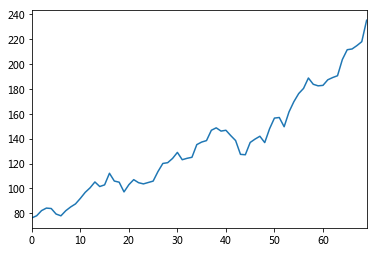

In [243]:
%pylab inline
df.columns = ['index', 'price']
df['price'] = df['price'].astype(float)
df['price'].plot(kind='line')

## 抓取EPS 資訊

In [251]:
import requests
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'17',
'year':'106',
'season':'01'    
    
}
res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data= payload)


In [253]:
res.encoding = 'UTF-8'
dfs = pandas.read_html(res.text)


In [261]:
df=dfs[0]
df.columns = df.ix[0,]
df.drop(0,axis=0, inplace=True)

In [267]:
df2= df[df['公司代號'].str.match('[0-9]+')]

In [270]:
df2.sort_values('基本每股盈餘(元)', ascending=False).head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
1,2809,京城商業銀行股份有限公司,金融保險業,1.08,新台幣 10.0000元,1923633,--,--,1239977
3,2881,富邦金融控股股份有限公司,金融保險業,0.97,新台幣 10.0000元,112817267,--,--,9849686
4,2882,國泰金融控股股份有限公司,金融保險業,0.85,新台幣 10.0000元,126926382,--,--,10790222
5,2850,新光產物保險股份有限公司,金融保險業,0.78,新台幣 10.0000元,3289758,279651,942,246440
6,6024,群益期貨股份有限公司,金融保險業,0.66,新台幣 10.0000元,504785,61130,50804,95134


In [282]:
import requests
payload = {
'encodeURIComponent':'1',
'step':'1',
'firstin':'1',
'TYPEK':'sii',
'code':'17',
'year':'106',
'season':'01'    
    
}
dfall = []
for year in range(102,107):
    for season in ['01', '02', '03', '04']:
        payload['year']   = year
        payload['season'] = season
        try:
            res = requests.post('http://mops.twse.com.tw/mops/web/ajax_t163sb19', data= payload)
            res.encoding = 'UTF-8'
            dfs = pandas.read_html(res.text)
            df=dfs[0]

            df.columns = df.ix[0,]
            df.drop(0,axis=0, inplace=True)
            df['year'] = year + 1911
            df['season'] = season
            df2= df[df['公司代號'].str.match('[0-9]+')]
            dfall.append(df2)
        except:
            pass

In [283]:
stock = pandas.concat(dfall)


In [284]:
stock.sort_values('基本每股盈餘(元)', ascending=False)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,year,season
1,2881,富邦金融控股股份有限公司,金融保險業,6.21,新台幣 10.0000元,430242760,--,--,63805832,2015,04
1,2881,富邦金融控股股份有限公司,金融保險業,5.89,新台幣 10.0000元,381835325,--,--,60482644,2014,04
1,2881,富邦金融控股股份有限公司,金融保險業,5.68,新台幣 10.0000元,318539177,--,--,58346994,2015,03
1,2881,富邦金融控股股份有限公司,金融保險業,5.24,新台幣 10.0000元,293852941,--,--,53775800,2014,03
1,2881,富邦金融控股股份有限公司,金融保險業,4.73,新台幣 10.0000元,438922708,--,--,48574756,2016,04
2,2882,國泰金融控股股份有限公司,金融保險業,4.58,新台幣 10.0000元,441265039,--,--,57882371,2015,04
2,2882,國泰金融控股股份有限公司,金融保險業,4.33,新台幣 10.0000元,348579020,--,--,54884753,2015,03
2,2809,京城商業銀行股份有限公司,金融保險業,4.33,新台幣 10.0000元,7764807,--,--,5196354,2014,04
1,2881,富邦金融控股股份有限公司,金融保險業,4.23,新台幣 10.0000元,318115766,--,--,44188002,2017,03
2,6024,群益期貨股份有限公司,金融保險業,4.18,新台幣 10.0000元,2254796,423921,179786,511759,2016,04


In [309]:
stock.year = stock.year.astype(str)
stock.season = stock.season.astype(str)

In [310]:
stock.season

1     01
2     01
4     01
5     01
6     01
7     01
8     01
9     01
10    01
11    01
12    01
13    01
14    01
15    01
16    01
17    01
18    01
19    01
20    01
21    01
22    01
23    01
24    01
25    01
26    01
27    01
28    01
29    01
30    01
31    01
      ..
7     03
8     03
9     03
10    03
12    03
13    03
14    03
15    03
16    03
17    03
18    03
19    03
20    03
22    03
23    03
24    03
25    03
26    03
27    03
28    03
29    03
30    03
31    03
32    03
33    03
34    03
35    03
36    03
37    03
38    03
Name: season, dtype: object

In [312]:
stock.index = stock.year + stock.season

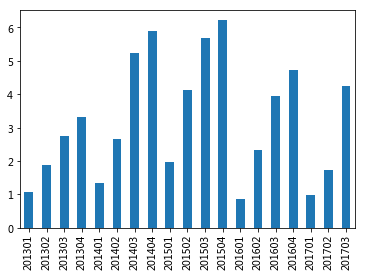

In [313]:
stock['基本每股盈餘(元)'] = stock['基本每股盈餘(元)'].astype(float)

stock.ix[stock['公司代號'] == '2881', '基本每股盈餘(元)'].plot(kind='bar')

## 圖形辨識

In [314]:
import requests
res = requests.get('http://doc.twse.com.tw/pdf/2201701_6180_AI1_20171112_103726.pdf')
with open('201701_6180_AI1_20171112_103726.pdf', 'wb') as f:
    f.write(res.content)

In [316]:
! pip install pdfminer3k

In [ ]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('201701_6180_AI1_20171112_103726.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        #if '列 入 合 併 財 務 報 告 之 子 公 司' in lt_obj.get_text():
        #    print(lt_obj)
        if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
            #if '列 入 合 併 財 務 報 告 之 子 公 司' in lt_obj.get_text():
            #    print(lt_obj)
            s = s + lt_obj.get_text()

## 辨識驗證碼

In [327]:
from PIL import Image
Image.open('1.png')

In [328]:
from pytesseract import image_to_string
image_to_string(Image.open('1.png'))

'7470'

## 抓取日報表資料

In [365]:
import requests
from bs4 import BeautifulSoup
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'  
}
rs  = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', headers = headers)
soup = BeautifulSoup(res.text, 'html.parser')

In [367]:
payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2330',
'CaptchaControl1':'C44J7',
'btnOK':'查詢'
}
for ele in soup.select('input[type="hidden"]'):
    payload[ele['name']] = ele['value']
payload

{'CaptchaControl1': 'C44J7',
 'RadioButton_Normal': 'RadioButton_Normal',
 'TextBox_Stkno': '2330',
 '__EVENTARGUMENT': '',
 '__EVENTTARGET': '',
 '__EVENTVALIDATION': '/wEdAAYOMDtGpw0QJPrAdEjv6zNSfMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6GqdvoOv3crBxvyEzH7QfyCg',
 '__LASTFOCUS': '',
 '__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkMDE0YjUyYzQtYmNiZS00ZDUxLWE1MTUtN2I3YWI3M2NiOGE2ZJss+q3wDSf+BW82IU1zcZg=',
 '__VIEWSTATEGENERATOR': 'AA1F01CB',
 'btnOK': '查詢'}

In [368]:
res2 = rs.get('http://bsr.twse.com.tw/bshtm/' + soup.select('img')[1]['src'], headers = headers)
with open('CaptchaImage.png', 'wb') as f:
    f.write(res2.content)

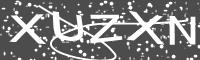

In [369]:
from PIL import Image 
Image.open('CaptchaImage.png')

In [370]:
payload['CaptchaControl1'] = 'XUZXN'

In [371]:
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', headers = headers, data = payload)
#res3.text

In [373]:
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx', headers = headers)
#res4.text

## Alternative

In [379]:
import requests
from bs4 import BeautifulSoup
headers = {
  'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'  
}
rs  = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', headers = headers)
soup = BeautifulSoup(res.text, 'html.parser')

payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2881',
#'CaptchaControl1':'123',
'btnOK':'查詢'
}
for ele in soup.select('input[type="hidden"]'):
    payload[ele['name']] = ele['value']
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', headers = headers, data = payload)
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx', headers = headers)
#res4.text